# DATA MINING PROJECT (CSE_382)

### Done by
Mariam Yasser Abdelmageed Meckawy - 18P3059

## Table Of Contents
* [Decision Tree](#Decision_Tree)
* [Support Vector Machines](#Support_Vector_Machines)
* [KNN](#KNN)
* [K-means](#K_means)

## Decision Tree <a class="anchor" id="Decision_Tree"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn import svm
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("cereal.csv", delimiter = ";")
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


### Data Preprocessing 
We cannot deal with string values data, so we will preform integer enconding 

In [4]:
str_to_int = preprocessing.LabelEncoder()
df = df.apply(str_to_int.fit_transform)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,0,3,0,1,3,1,9,11,1,7,33,1,2,2,1,73
1,1,5,0,6,2,4,1,3,3,9,24,0,2,2,7,20
2,2,2,0,1,3,1,23,10,2,6,34,1,2,2,1,67
3,3,2,0,0,3,0,11,12,3,1,35,1,2,2,2,76
4,4,6,0,5,1,2,17,1,12,9,0,1,2,2,4,22


In [5]:
df.describe() #describing each column

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,38.000000,2.727273,0.038961,4.727273,1.545455,1.000000,13.207792,3.285714,11.961039,7.922078,14.701299,0.974026,1.207792,2.285714,5.000000,38.000000
std,22.371857,1.729286,0.194771,1.839882,1.094790,0.959715,7.489181,3.174144,4.894792,4.444885,9.438255,0.428401,0.832524,1.061988,2.328315,22.371857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,0.000000,4.000000,1.000000,0.000000,9.000000,1.000000,9.000000,4.000000,6.000000,1.000000,0.000000,2.000000,3.000000,19.000000
50%,38.000000,2.000000,0.000000,5.000000,2.000000,1.000000,15.000000,3.000000,12.000000,8.000000,15.000000,1.000000,1.000000,2.000000,4.000000,38.000000
75%,57.000000,4.000000,0.000000,5.000000,2.000000,2.000000,18.000000,6.000000,15.000000,12.000000,21.000000,1.000000,2.000000,2.000000,7.000000,57.000000
max,76.000000,6.000000,1.000000,10.000000,5.000000,4.000000,26.000000,12.000000,21.000000,16.000000,35.000000,2.000000,2.000000,6.000000,11.000000,76.000000


### Correlation

We will make a model that predicts the amount of **vitamins** in the cereal from the nutritional features given but first we will drop highly correlated columns, to avoid curse of dimensionality

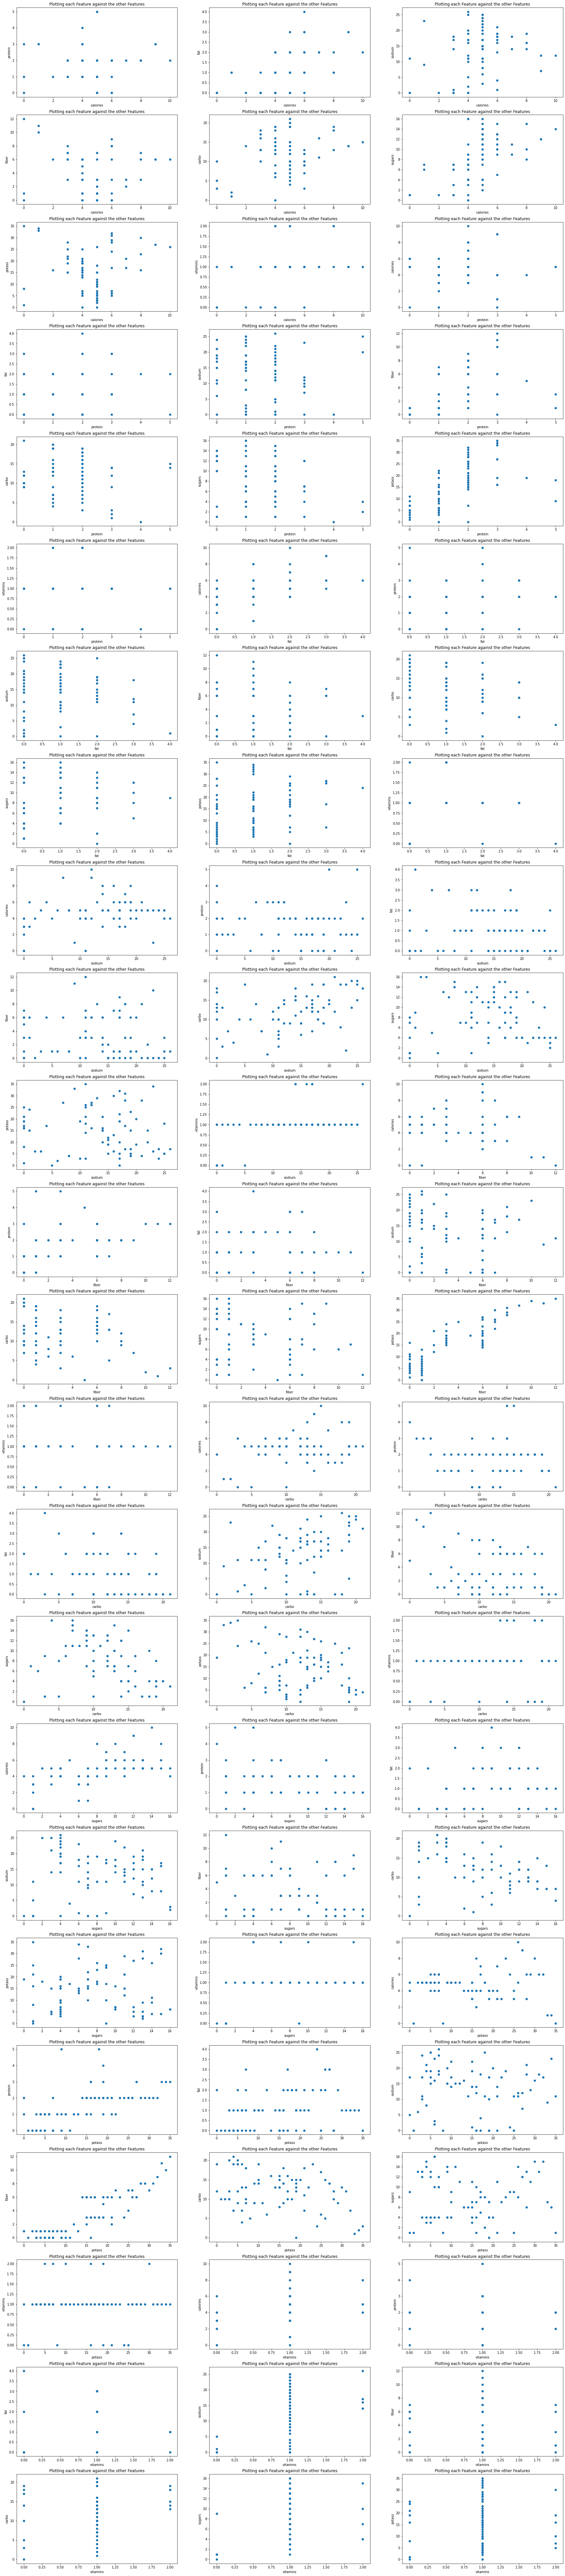

In [6]:
#plotting some features with the other features to view correlation between features
index=1
features = ["calories", "protein", "fat", "sodium", "fiber", "carbo", "sugars", "potass", "vitamins"]
X = df[features]
figure= plt.figure(figsize=(30,150))
for i in features:
    for j in features:
        if(i!=j):
            ax1 = figure.add_subplot(25,3,index)
            ax1.scatter(X[[i]],X[[j]] )
            plt.xlabel("{}".format(i))
            plt.ylabel("{}".format(j))
            plt.title("Plotting each Feature against the other Features")
            index+=1

Measuring correlation coefficient between each two features

In [7]:
cor_matrix = df[df.columns[3:12]].corr().abs()
print(cor_matrix)

          calories   protein       fat    sodium     fiber     carbo  \
calories  1.000000  0.016034  0.521617  0.272496  0.135183  0.267636   
protein   0.016034  1.000000  0.212893  0.052521  0.537672  0.089287   
fat       0.521617  0.212893  1.000000  0.007323  0.095026  0.310909   
sodium    0.272496  0.052521  0.007323  1.000000  0.134266  0.363468   
fiber     0.135183  0.537672  0.095026  0.134266  1.000000  0.247412   
carbo     0.267636  0.089287  0.310909  0.363468  0.247412  1.000000   
sugars    0.562100  0.329142  0.280689  0.059388  0.134562  0.359981   
potass    0.035406  0.601738  0.294882  0.089206  0.886568  0.289910   
vitamins  0.358151  0.025504  0.032003  0.510243  0.042852  0.219130   

            sugars    potass  vitamins  
calories  0.562100  0.035406  0.358151  
protein   0.329142  0.601738  0.025504  
fat       0.280689  0.294882  0.032003  
sodium    0.059388  0.089206  0.510243  
fiber     0.134562  0.886568  0.042852  
carbo     0.359981  0.289910  0.2

In [8]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.55)]
print('Features to drop: '+ str(to_drop))

Features to drop: ['sugars', 'potass']


We will drop **sugar** and leave **potass**

In [9]:
features = [ "calories", "fat", "sodium", "fiber", "carbo",  "potass", "protein"]
X = df[features]
Y = df.vitamins

In [10]:
#we will divide the data into training and testing data with the ratios 75% and 25% respectively
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [11]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [12]:
y_pred = classifier.predict(x_test)
print("The predicted accuracy is {}".format(accuracy_score(y_test, y_pred)))

The predicted accuracy is 0.85


## Model Evaluation
Confusion matrix is an NxN matrix used for evaluating the performance of a classification model and measuring accuracy, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.

In [13]:
print(confusion_matrix(y_test, y_pred))

[[ 1  0  0]
 [ 1 16  0]
 [ 0  2  0]]


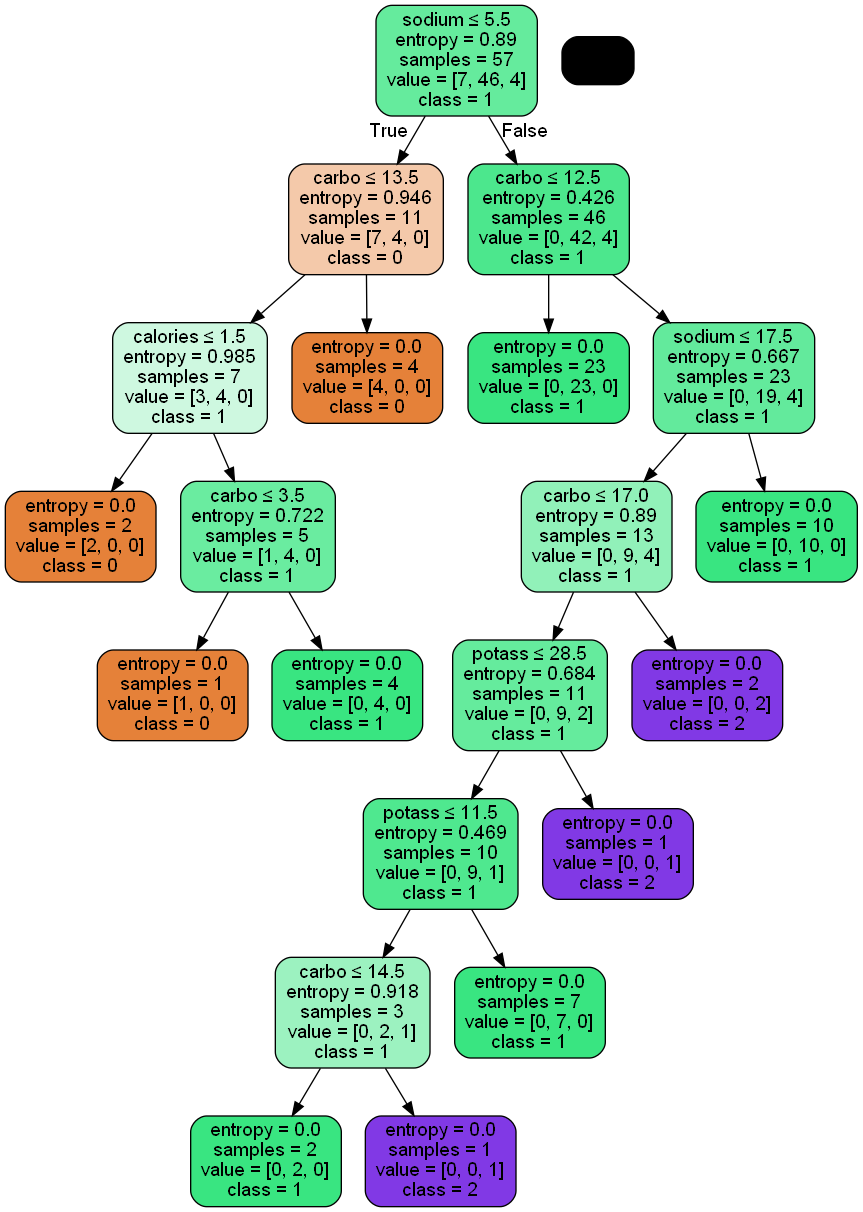

In [14]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file = dot_data, rounded = True, filled = True, special_characters = True,
               feature_names = features, class_names = ["0","1","2"]) #we have 3 classes of vitamins
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png("Play Tennis.png")
Image(graph.create_png())

## Support Vector Machines  <a class="anchor" id="Support_Vector_Machines"></a>

We will classify the same dataset by the amount of vitamins again but using a different classification method

In [15]:
svm_clf_org = svm.SVC()
svm_clf_org.fit(x_train,y_train)

SVC()

The number of support vectors for each class can be revealed using **nsupport** attribute <br>
To get the indices of the support vectors, use **support_** attribute

In [16]:
svm_clf_org.n_support_

array([ 7, 17,  4])

In [17]:
svm_clf_org.support_ 

array([ 2,  7, 33, 43, 45, 49, 51,  4,  8, 11, 12, 14, 15, 20, 21, 23, 24,
       26, 29, 30, 31, 34, 36, 41,  1,  6, 16, 22])

In [18]:
svm_clf_org.support_vectors_ #identify support vectors

array([[ 2.,  0.,  0.,  6., 14., 16.,  1.],
       [ 0.,  0.,  0.,  1.,  5.,  8.,  1.],
       [ 0.,  0.,  0.,  0., 10.,  1.,  0.],
       [ 3.,  0.,  0.,  6., 18., 21.,  2.],
       [ 4.,  0.,  5.,  1., 19.,  0.,  2.],
       [ 6.,  4.,  1.,  3.,  3., 24.,  2.],
       [ 3.,  0.,  0.,  7., 17., 25.,  2.],
       [ 5.,  0., 25.,  0., 20.,  5.,  1.],
       [ 5.,  0., 14.,  6., 15., 15.,  2.],
       [ 5.,  0., 19.,  1., 19.,  4.,  1.],
       [ 3.,  0.,  1.,  6., 13., 15.,  1.],
       [ 9.,  3.,  7.,  6., 14., 27.,  3.],
       [ 4.,  1., 10.,  3., 12., 19.,  3.],
       [ 5.,  0.,  6.,  1., 10.,  2.,  0.],
       [ 1.,  1.,  9., 11.,  1., 33.,  3.],
       [ 6.,  1., 16.,  0., 13.,  6.,  1.],
       [ 7.,  2., 18.,  3., 16., 17.,  2.],
       [ 6.,  1., 17.,  9.,  7., 32.,  2.],
       [ 4.,  1., 11.,  6., 13., 14.,  2.],
       [ 4.,  0.,  2.,  0.,  7.,  6.,  1.],
       [ 8.,  2., 19.,  6., 19., 23.,  2.],
       [ 4.,  0., 16.,  1., 16., 13.,  1.],
       [ 5.,  1.,  3.,  1.,  4.,

In [19]:
#Grid search parameters for Hyper Tuning
param_grid = { 'C':[0.001,0.01,0.1,1],
               'kernel':['rbf','poly','sigmoid','linear'],
               'degree':[2,3,4,5,6],
               'gamma': ['scale','auto',0.01, 0.001, 0.0001],
               'class_weight':['balanced']}

svm_clf = GridSearchCV(svm_clf_org, param_grid, cv=3,verbose=True)
# fitting the model for grid search
svm_clf.fit(x_train, y_train)
print(svm_clf.best_estimator_)
print("Optimal Hyperparameters: ", svm_clf.best_params_)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
SVC(C=0.001, class_weight='balanced', gamma='auto', kernel='poly')
Optimal Hyperparameters:  {'C': 0.001, 'class_weight': 'balanced', 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}


### Observation
According to the grid search, we will use non-linear SVM (poly) with degree **3**, because that's what best fits our data and features

### Evaluation Metrics

In [20]:
print('Training Accuracy = ' + str(svm_clf.score(x_train, y_train)))
print('Testing Accuracy = ' + str(svm_clf.score(x_test, y_test)))

Training Accuracy = 1.0
Testing Accuracy = 0.7


In [21]:
y_pred = svm_clf.predict(x_test)
print('Precision = ' + str(precision_score(y_test,y_pred, average="weighted")))
print('Recall = ' + str(recall_score(y_test,y_pred, average="weighted")))
print('F1-score = ' + str(f1_score(y_test,y_pred, average="weighted")))

Precision = 0.7866666666666667
Recall = 0.7
F1-score = 0.740625


## Plot Decision Boundary

We have too many features so we will only draw 2 features per graph, First we have **Fat** and **Calories** on 2D graph

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

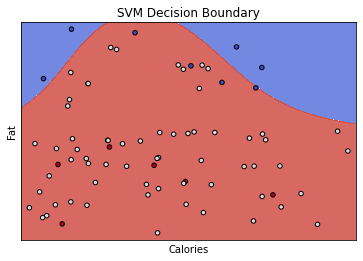

In [23]:
model = svm.SVC(kernel='poly')
clf = model.fit(Xreduced, Y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Poly SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Fat')
ax.set_xlabel('Calories')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVM Decision Boundary')
plt.show()

The second 2 features are **Sodium** and **Fiber**

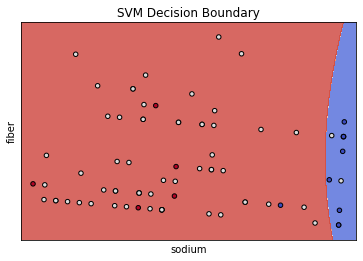

In [24]:
features2 = ["sodium", "fiber"]
X2 = df[features2]
Xreduced = pca.fit_transform(X2)
model = svm.SVC(kernel='poly')
clf = model.fit(Xreduced, Y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Poly SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlabel('sodium')
ax.set_ylabel('fiber')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVM Decision Boundary')
plt.show()

The third 2 features are **Potassium** and **Carbohydrates**

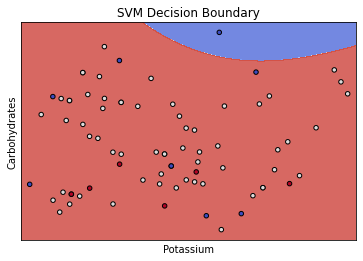

In [25]:
features3 = ["potass", "carbo"]
X3 = df[features3]
Xreduced = pca.fit_transform(X3)
model = svm.SVC(kernel='poly')
clf = model.fit(Xreduced, Y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Poly SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlabel('Potassium')
ax.set_ylabel('Carbohydrates')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVM Decision Boundary')
plt.show()

## KNN <a class="anchor" id="KNN"></a>

In [26]:
knn_params = {'n_neighbors': list(range(1,20))}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv = 3)
knn_model.fit(x_train, y_train)
knn_train_pred = knn_model.predict(x_train)
knn_test_pred = knn_model.predict(x_test)
print('Best K for' + str(knn_model.best_params_))

Best K for{'n_neighbors': 3}


In [27]:
y_pred = knn_model.predict(x_test)
print('Precision = ' + str(precision_score(y_test,y_pred, average="weighted")))
print('Recall = ' + str(recall_score(y_test,y_pred, average="weighted")))
print('F1-score = ' + str(f1_score(y_test,y_pred, average="weighted")))

Precision = 0.7224999999999999
Recall = 0.85
F1-score = 0.7810810810810811


We cannot draw the KNN between all the features as well so we will test it on 2 data features

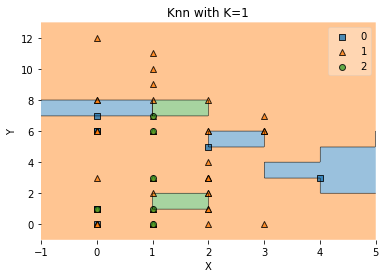

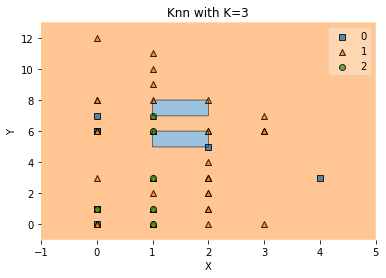

In [28]:
def knn_comparison(data, k):
    X = data[['fat','fiber']].values
    Y = data['vitamins' ].astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, Y)# Plotting decision region
    plot_decision_regions(X, Y, clf=clf, legend=1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K='+ str(k))
    plt.show()
for i in [1,3]:
    knn_comparison(df, i)

## K-means <a class="anchor" id="K_means"></a>

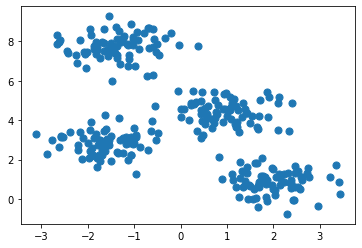

In [29]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

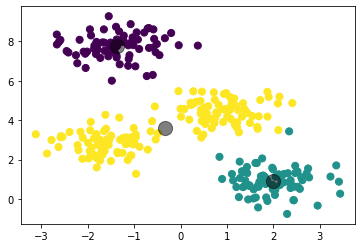

In [30]:
kmeans = KMeans(n_clusters=3) #divide the data to 3 clusters
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [31]:
df.reset_index(drop=True, inplace=True)
X = df.iloc[:, :2]
Y = df.iloc[:, 12]
kmeans = KMeans(n_clusters=5, random_state=0).fit(X) # 5 clusters dataset

In [32]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])